## Insights from Heart Disease Dataset Analysis
## Approach to Analysis
   - I analyzed the heart disease dataset using several statistical approaches to uncover meaningful patterns and relationships:
    
   - Correlation Analysis: Examined relationships between numerical variables and disease presence
    
   - Group Comparisons: Compared means and distributions between disease and no-disease groups
    
   - Categorical Analysis: Used frequency distributions and chi-square tests for categorical variables
    
   - Visual Pattern Recognition: Identified trends in how variables relate to disease outcomes


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv("cleaned_data_heart.csv")
df.head()


,age,sex,chest pain type,resting blood pressure,serum cholestoral(mg/dl),fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,Induced depression(exercise vs rest),slope peak exercise,colored vessels,thalassemia,disease condition
0,69,male,typical angina,160,234,True,left ventricular hypertrophy,131,no,0.1,flat,1,normal,no disease
1,69,female,typical angina,140,239,False,normal,151,no,1.8,upsloping,2,normal,no disease
2,66,female,typical angina,150,226,False,normal,114,no,2.6,downsloping,0,normal,no disease
3,65,male,typical angina,138,282,True,left ventricular hypertrophy,174,no,1.4,flat,1,normal,disease
4,64,male,typical angina,110,211,False,left ventricular hypertrophy,144,yes,1.8,flat,0,normal,no disease


# Insight Generation

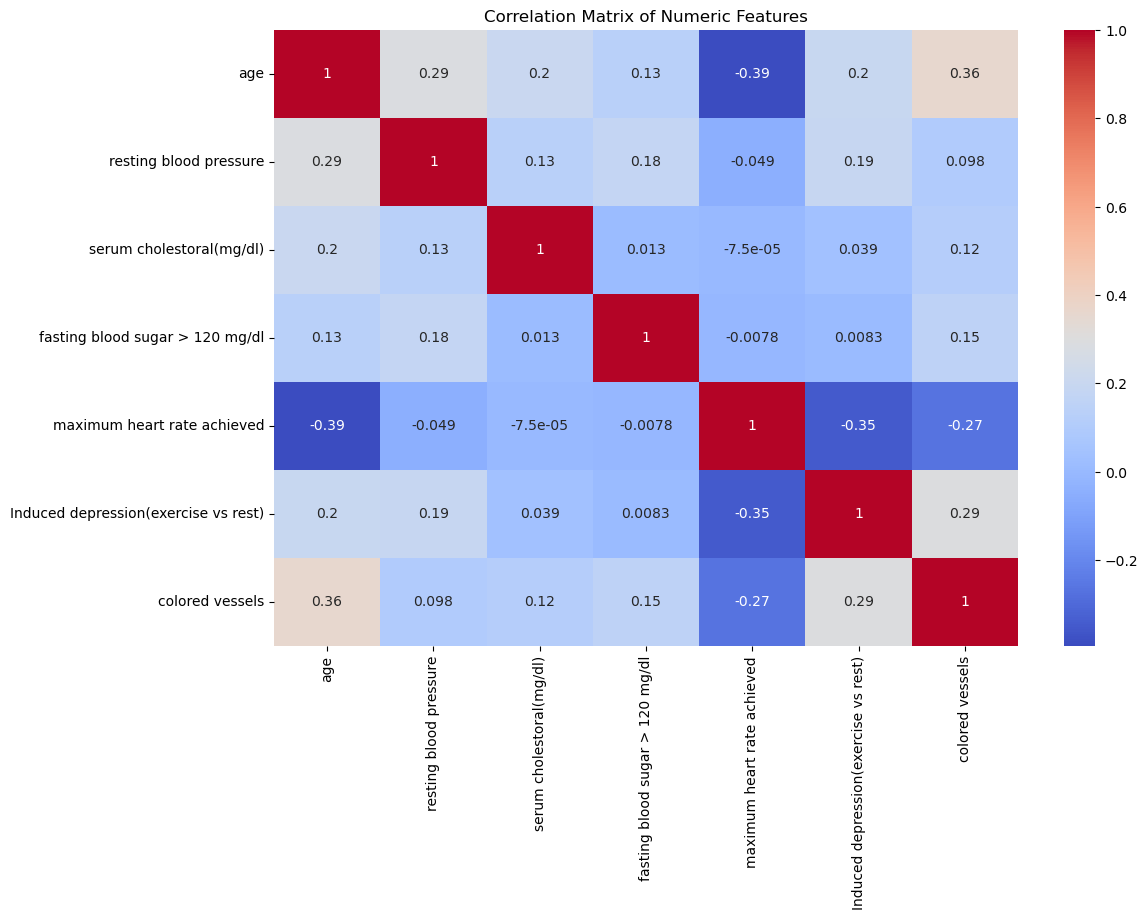

In [26]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numeric Features")
plt.show()

#### Age and Maximum Heart Rate Achieved:
Correlation: -0.39
Negative correlation: As age increases, Maximum heart rate achieved tend to decrease.
#### Age and Colored Vessels:
Correlation: 0.36
Mild Positive correlation: Older individuals tend to have more colored vessels(likely indicating narrowing of vessels).
#### Resting Blood Pressure and Serum Cholesterol:
Correlation:0.13
Very weak Positive relationship.
#### Most Other Correlations:
Between -0.1 and +0.2 
Very weak or no signficant correlation.
#### Maximum Heart Rate Vs induced Depression 
Correlation:-0.35
Negative Correlation: Lower Maximum heart rate may be linked with more exercise-induced depression.

## Group by disease condition and get mean of all features

In [37]:
grouped = df.groupby('disease condition').mean(numeric_only=True)
print(grouped)

                         age  resting blood pressure  \
disease condition                                      
disease            56.759124              134.635036   
no disease         52.643750              129.175000   

                   serum cholestoral(mg/dl)  fasting blood sugar > 120 mg/dl  \
disease condition                                                              
disease                          251.854015                         0.145985   
no disease                       243.493750                         0.143750   

                   maximum heart rate achieved  \
disease condition                                
disease                             139.109489   
no disease                          158.581250   

                   Induced depression(exercise vs rest)  colored vessels  
disease condition                                                         
disease                                        1.589051         1.145985  
no disease                  

### Summary
People with heart disease tend to be:
##### Older 
##### Have higher blood pressure and cholesterol
##### Achieve lower heart rates during tests
##### Experience more stress/depression during exercise
##### Have more colored vessels 

### Compare sex-wise disease rates

In [39]:
df['disease condition'] = df['disease condition'].map({'no disease': 0, 'disease': 1})

In [40]:
disease_by_sex = df.groupby('sex')['disease condition'].mean() * 100
print(disease_by_sex)

sex
female    26.041667
male      55.721393
Name: disease condition, dtype: float64


##### Males have a much higher rate of heart disease (56%) compared to females (26%)
##### this suggests men are more than twice as likely to have heart disease in this dataset 

### Chest pain type vs disease rate

In [41]:
disease_by_cp = df.groupby('chest pain type')['disease condition'].mean() * 100
print(disease_by_cp)

chest pain type
asymptomatic        72.535211
atypical angina     18.367347
non-anginal pain    21.686747
typical angina      30.434783
Name: disease condition, dtype: float64


##### Asymptomatic Patients have the highest rate of hear disease (72.53%) meaning they don't feel chest pain, but still have disease.
##### Typical Angina shows a moderate disease rate (30%) 
##### Atypical Angina and Non anginal pain have lower disease rates (18%-22%) indicating less association with heart disease.

### Aggregating multiple statistics

In [42]:
agg_result = df.groupby('disease condition').agg({
    'age': ['mean', 'median'],
    'resting blood pressure': ['mean', 'min', 'max'],
    'maximum heart rate achieved': ['mean', 'min', 'max']
})
print(agg_result)

                         age        resting blood pressure            \
                        mean median                   mean  min  max   
disease condition                                                      
0                  52.643750   52.0             129.175000   94  180   
1                  56.759124   58.0             134.635036  100  200   

                  maximum heart rate achieved           
                                         mean min  max  
disease condition                                       
0                                  158.581250  96  202  
1                                  139.109489  71  195  


##### Age is clearly a risk factor : Older people are more likely to have heart disease.
##### Resting blood pressure is consistently higher amoung the diseased group.
##### Maximum Heart rate achieved is lower in disease patients, likely due to physical limitations or blocked arteries.